# Mobile Price Hike Data

#### import relevant libraries

In [56]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import os
import csv
import sys
import warnings

from collections import defaultdict, Counter

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 10000)

sb.set_style('darkgrid')
sb.set()

warnings.simplefilter('ignore')

#### Load and Explore Dataset

In [57]:
df = pd.read_csv("D:\Open Classroom\Datasets\Mobile price hike data\Mobile dataset.csv")
df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [58]:
df.shape

(430, 16)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

In [60]:
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
ROM,430.0,105.75,63.16,8.00,64.00,128.00,128.00,512.00
RAM,430.0,5.32,2.18,1.00,4.00,4.00,6.00,12.00
display_size,430.0,6.37,0.37,4.70,6.30,6.50,6.50,7.60
num_rear_camera,430.0,2.90,0.95,1.00,2.00,3.00,4.00,4.00
num_front_camera,430.0,1.04,0.23,1.00,1.00,1.00,1.00,3.00
battery_capacity,430.0,4529.40,986.91,1800.00,4000.00,4500.00,5000.00,7000.00
ratings,430.0,4.34,0.15,3.00,4.30,4.30,4.40,4.60
num_of_ratings,430.0,23567.94,56096.28,4.00,745.00,5197.50,21089.25,642373.00
sales_price,430.0,25433.23,22471.93,5742.00,11999.00,16989.50,28999.00,157999.00
discount_percent,430.0,0.11,0.07,0.01,0.06,0.09,0.16,0.44


In [61]:
df.isnull().sum()

brand               0
model               0
base_color          0
processor           0
screen_size         0
ROM                 0
RAM                 0
display_size        0
num_rear_camera     0
num_front_camera    0
battery_capacity    0
ratings             0
num_of_ratings      0
sales_price         0
discount_percent    0
sales               0
dtype: int64

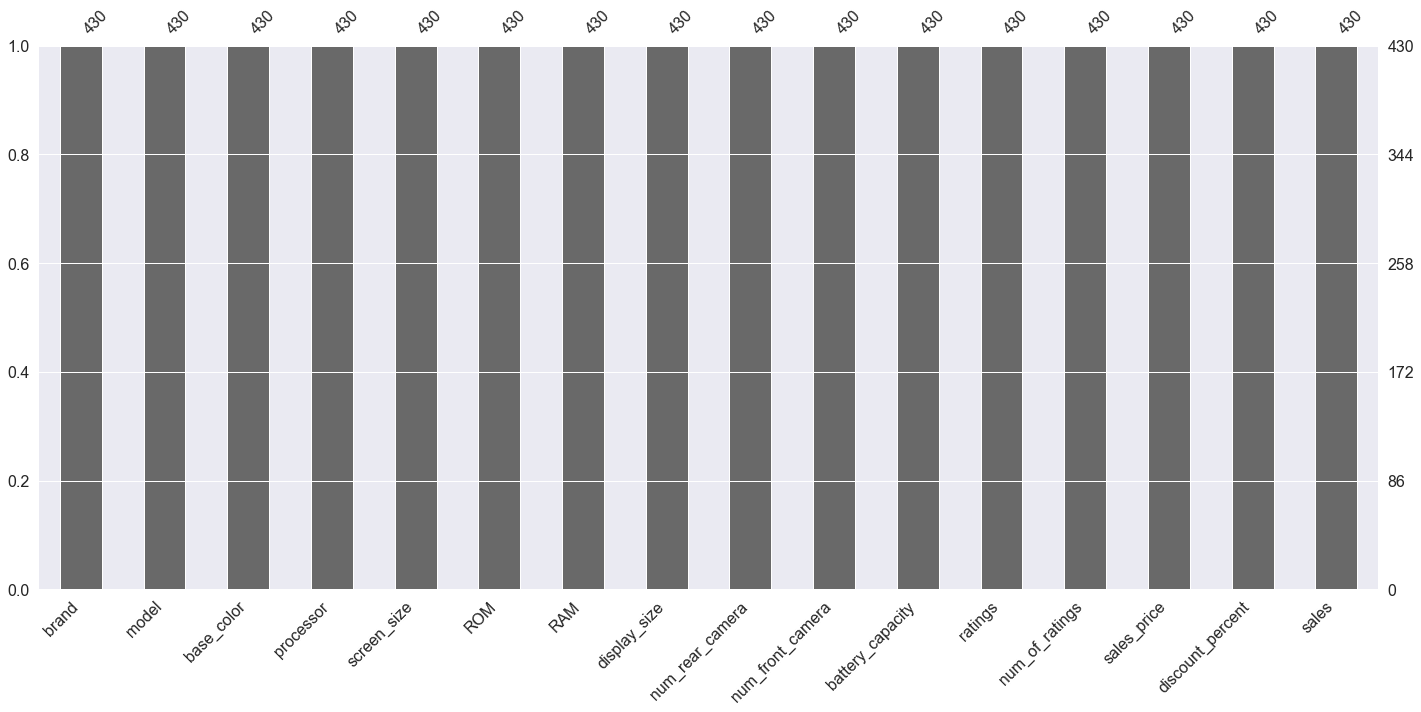

In [62]:
msno.bar(df)

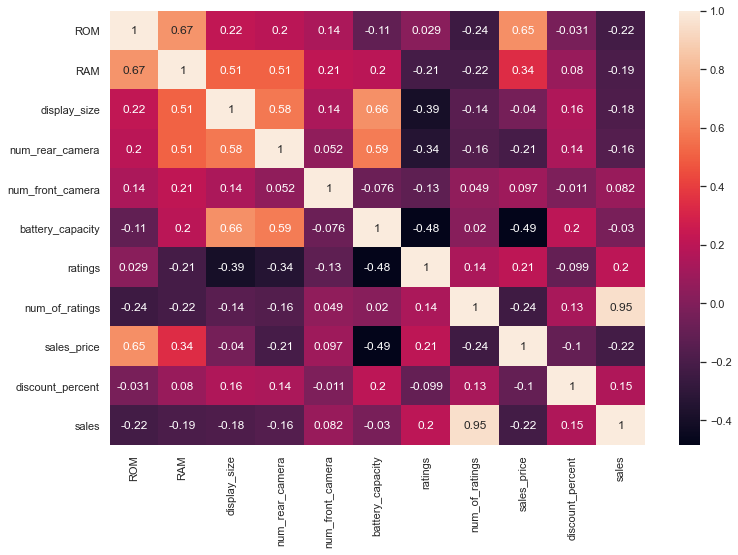

In [63]:
plt.figure(figsize = (12, 8))
sb.heatmap(df.corr(), annot = True)

In [64]:
df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


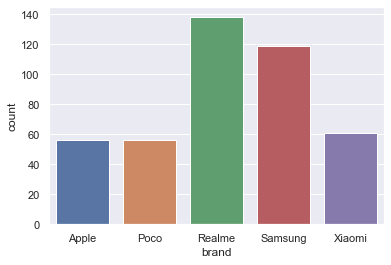

In [65]:
sb.countplot(df['brand'])

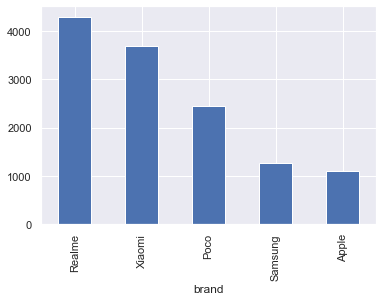

In [66]:
brand_sales = df.groupby('brand')
brand_sales['sales'].sum().sort_values(ascending = False).plot(kind = 'bar')

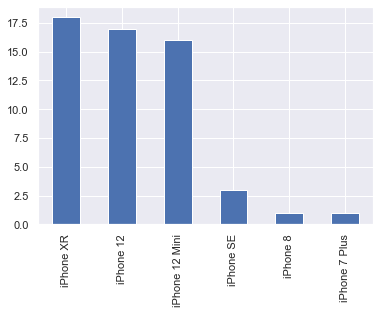

In [67]:
brand_filt = df.where(df['brand'] == 'Apple')
brand_filt['model'].value_counts().plot(kind = 'bar')

In [68]:
df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


#### Feature Engineering

In [69]:
x = df.drop(columns = ['sales_price', 'brand', 'model', 'base_color', 'processor', 'screen_size'])
y = df['sales_price']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [102]:
LR = LinearRegression()

LR.fit(x_train, y_train)

pred = LR.predict(x_train)

df['predict'] = pd.Series(pred)

print(LR.score(x_train, pred))

1.0


In [86]:
df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales,predict
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52,22278.894415
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39,53509.824749
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52,52196.000532
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07,12258.447088
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15,27104.098330


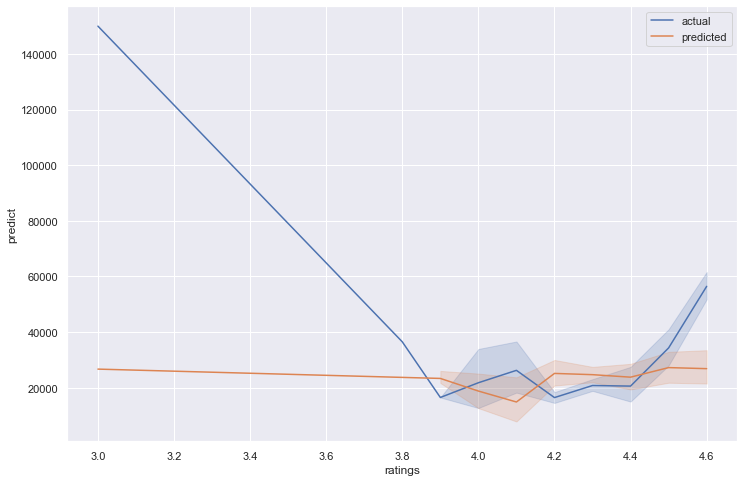

In [92]:
plt.figure(figsize = (12,8))
sb.lineplot(x = df['ratings'], y = df['sales_price'], label='actual')
sb.lineplot(x = df['ratings'], y = df['predict'], label='predicted')

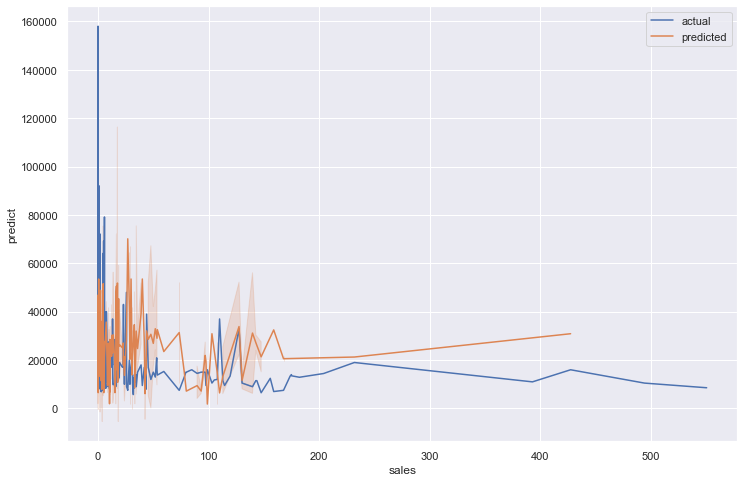

In [97]:
plt.figure(figsize = (12,8))
sb.lineplot(x = df['sales'], y = df['sales_price'], label='actual')
sb.lineplot(x = df['sales'], y = df['predict'], label='predicted')